In [1]:
import numpy as np, scipy as sp
from matplotlib import pyplot as plt
from numpy.random import random # import only one function
from numpy.random import randint

In [2]:
width = 3
state = random(size=(width,width))

In [3]:
state

array([[0.24648743, 0.8931537 , 0.58881161],
       [0.00361218, 0.94929945, 0.321378  ],
       [0.44948146, 0.60882675, 0.98261167]])

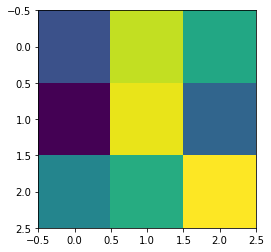

In [4]:
plt.imshow(state)

In [5]:
state[state<=0.5] = -1

In [6]:
state

array([[-1.        ,  0.8931537 ,  0.58881161],
       [-1.        ,  0.94929945, -1.        ],
       [-1.        ,  0.60882675,  0.98261167]])

In [7]:
state[state>0.5] = 1

In [8]:
state

array([[-1.,  1.,  1.],
       [-1.,  1., -1.],
       [-1.,  1.,  1.]])

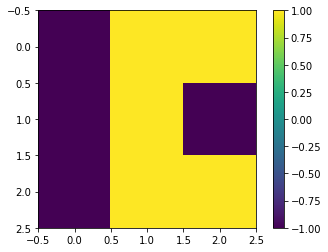

In [9]:
plt.imshow(state)
plt.colorbar()

In [10]:
state

array([[-1.,  1.,  1.],
       [-1.,  1., -1.],
       [-1.,  1.,  1.]])

In [15]:
# left ....................right
state[1,1] * state[1,0]  + state[1,1] * state[1,2]

2.0

We want some language to say "add up the product with all of our neighbors"

In [11]:
def energy_internal(state):
    # minus sign means like neighbors give a negative number
    return -np.sum(
        state * np.roll(state, 1, axis=0) + # get all of the neighbors in one direction
        state * np.roll(state, 1, axis=1) +
        state * np.roll(state, -1, axis=0) +
        state * np.roll(state, -1, axis=1)
    )/2
        
    

In [12]:
energy_internal(state)

-2.0

At the end of class, I mentioned that the above was going to be slightly wrong for two reasons

* It counts everything twice, so we need a factor of two
* It needs a negative sign

We'll discuss those tomorrow

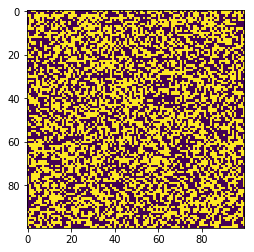

In [49]:
width = 100
state = random(size=(width,width))
state[state<=0.5] = -1
state[state>0.5] = 1
plt.imshow(state)

## How do we use the Ising model

1. Pick a random row and column
2. Flip that one. If it was -1, make it +1. If it was +1, make it -1.
3. Do we want to take that coin flip? Well, if it's lower in energy, yes. If it's higher in energy, no.

Fancier version, called Metropolis Monte Carlo

1. Pick a random row and column
2. Flip that one. If it was -1, make it +1. If it was +1, make it -1.
3. Do we want to take that coin flip? 
   1. If it's lower energy, yes.
   2. If it's higher energy, do something based on temperature.\

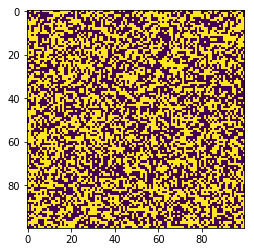

In [63]:
width = 100
state = random(size=(width,width))
state[state<=0.5] = -1
state[state>0.5] = 1
plt.imshow(state)

## Run it at the temperature where we start to have domains

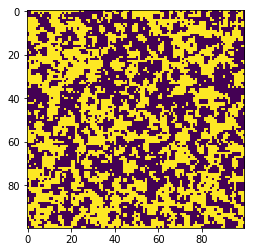

In [65]:
ntrials = 20000
T = 2.27
for ntrial in range(ntrials):
    row, column = randint(width), randint(width)
    # flip one at random
    # if it's lower in energy, take it. otherwise, reject it.
    new_state = state.copy()
    new_state[row,column] = -state[row,column]
    energy_change = energy_internal(new_state) - energy_internal(state)
    if energy_change < 0: # this asks if the new state is better
        state = new_state
    else:
        if random() < np.exp(-energy_change/T):
            state = new_state
plt.imshow(state)

## Heat it up, should see the domains "melt"

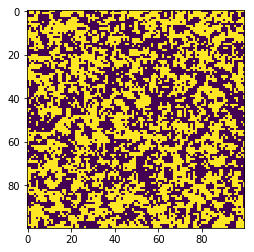

In [66]:
ntrials = 20000
T = 4.0
for ntrial in range(ntrials):
    row, column = randint(width), randint(width)
    # flip one at random
    # if it's lower in energy, take it. otherwise, reject it.
    new_state = state.copy()
    new_state[row,column] = -state[row,column]
    energy_change = energy_internal(new_state) - energy_internal(state)
    if energy_change < 0: # this asks if the new state is better
        state = new_state
    else:
        if random() < np.exp(-energy_change/T):
            state = new_state
plt.imshow(state)

## Cool it down, should see it freeze

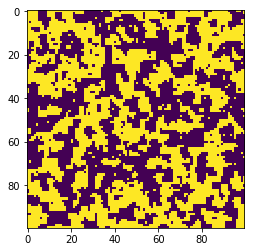

In [67]:
ntrials = 20000
T = 1.0
for ntrial in range(ntrials):
    row, column = randint(width), randint(width)
    # flip one at random
    # if it's lower in energy, take it. otherwise, reject it.
    new_state = state.copy()
    new_state[row,column] = -state[row,column]
    energy_change = energy_internal(new_state) - energy_internal(state)
    if energy_change < 0: # this asks if the new state is better
        state = new_state
    else:
        if random() < np.exp(-energy_change/T):
            state = new_state
plt.imshow(state)